In [1]:
import pandas as pd

# Load the Airbnb dataset
file_path = "UK_airbnb.csv"
df = pd.read_csv(file_path)

# Show basic info and preview
df_info = df.info()
df_head = df.head()

df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,69330,6.935100e+04,69346,0.0,69351,69351.000000,69351.000000,69351,69351.000000,69351.000000,69351.000000,52571,52571.000000,69351.000000,69351.000000,69351.000000,0.0
unique,NaN,67029,NaN,13043,NaN,33,NaN,NaN,4,NaN,NaN,NaN,2728,NaN,NaN,NaN,NaN,NaN
top,NaN,✿♫✯Very Nice Room Near Red Cross Garden Park✯♫✿,NaN,Alex,NaN,Westminster,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-09-04,NaN,NaN,NaN,NaN,NaN
freq,NaN,115,NaN,523,NaN,7763,NaN,NaN,41224,NaN,NaN,NaN,1215,NaN,NaN,NaN,NaN,NaN
mean,1.373703e+17,NaN,1.242124e+08,NaN,NaN,NaN,51.509544,-0.128489,NaN,177.208822,5.997505,17.537051,NaN,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,NaN,1.377104e+08,NaN,NaN,NaN,0.049182,0.100957,NaN,412.823024,25.709514,40.410763,NaN,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,NaN,4.775000e+03,NaN,NaN,NaN,51.272480,-0.523600,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,NaN,1.870718e+07,NaN,NaN,NaN,51.483140,-0.189520,NaN,55.000000,1.000000,1.000000,NaN,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,NaN,6.010350e+07,NaN,NaN,NaN,51.513600,-0.126200,NaN,100.000000,2.000000,4.000000,NaN,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,NaN,1.960405e+08,NaN,NaN,NaN,51.539710,-0.068550,NaN,180.000000,4.000000,16.000000,NaN,1.080000,4.000000,228.000000,5.000000,NaN


In [2]:
# Re-import necessary libraries due to code state reset
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


# Clean and transform
df_cleaned = df.drop(columns=['neighbourhood_group', 'license'])
df_cleaned = df_cleaned[df_cleaned['price'] > 0]

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df_cleaned['longitude'], df_cleaned['latitude'])]
gdf = gpd.GeoDataFrame(df_cleaned, geometry=geometry, crs='EPSG:4326')

# Project to British National Grid
gdf_projected = gdf.to_crs(epsg=27700)

gdf_projected.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,geometry
0,106332,"Lovely large room, Bethnal Green",264345,Susie,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,POINT (535089.756 182886.821)
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,POINT (530901.013 187213.787)
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,POINT (533682.377 182823.988)
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,POINT (531572.006 182353.814)
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,POINT (524995.812 181059.452)


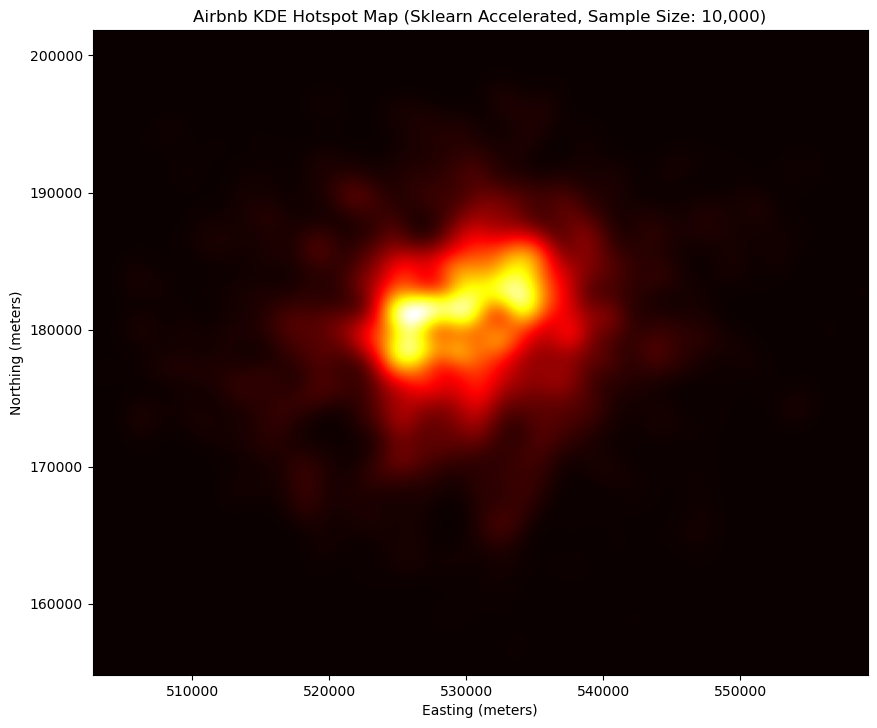

In [3]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

# Sample data to speed up testing
sample = gdf_projected.sample(10000, random_state=66)
x = sample.geometry.x.values
y = sample.geometry.y.values
xy = np.vstack([x, y]).T

# KDE parameters
kde_sklearn = KernelDensity(bandwidth=1000, metric='euclidean', kernel='gaussian')
kde_sklearn.fit(xy)

# Create grid coordinates
xmin, ymin, xmax, ymax = sample.total_bounds
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
grid_coords = np.vstack([xx.ravel(), yy.ravel()]).T

# Estimate density
log_density = kde_sklearn.score_samples(grid_coords)
density = np.exp(log_density).reshape(xx.shape)

# Plot KDE heatmap
plt.figure(figsize=(10, 10))
plt.imshow(density, cmap='hot', extent=(xmin, xmax, ymin, ymax), origin='lower')
plt.title("Airbnb KDE Hotspot Map (Sklearn Accelerated, Sample Size: 10,000)")
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")
plt.grid(False)
plt.show()


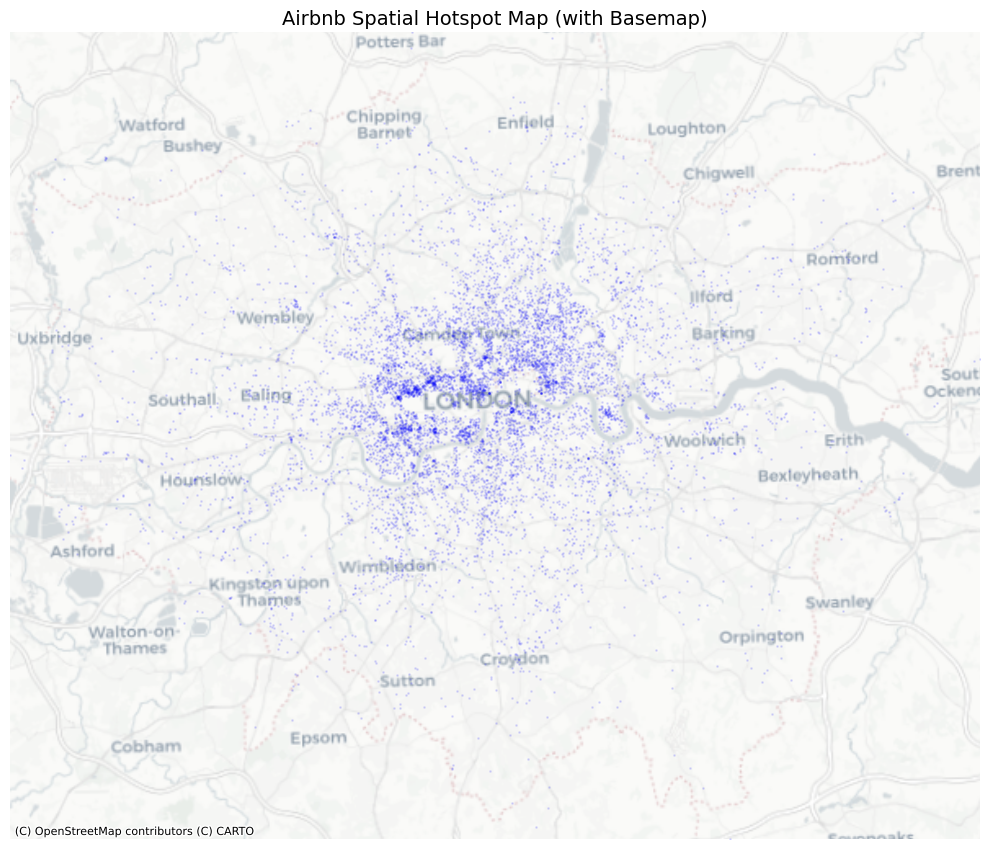

In [4]:
import contextily as ctx

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot KDE heatmap as background
ax.imshow(
    density,
    cmap='hot',
    extent=(xmin, xmax, ymin, ymax),
    origin='lower',
    alpha=0.6
)

# Optionally overlay point boundaries
sample.plot(ax=ax, markersize=1, color='blue', alpha=0.1)

# Add basemap
ax.set_axis_off()
ctx.add_basemap(ax, crs=gdf_projected.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Set title
ax.set_title("Airbnb Spatial Hotspot Map (with Basemap)", fontsize=14)
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt
import contextily as ctx

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot KDE heatmap as background
ax.imshow(
    density,
    cmap='hot',
    extent=(xmin, xmax, ymin, ymax),
    origin='lower',
    alpha=0.6
)

# Optionally overlay point boundaries
sample.plot(ax=ax, markersize=1, color='blue', alpha=0.1)

# Add basemap
ax.set_axis_off()
ctx.add_basemap(ax, crs=gdf_projected.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Set title
ax.set_title("Airbnb Spatial Hotspot Map (with Basemap)", fontsize=14)
plt.tight_layout()

# Save the figure
output_path = "airbnb_hotspot_map.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Map saved to: {output_path}")


Map saved to: airbnb_hotspot_map.png


In [5]:
from pointpats import PointPattern, QStatistic, window as pp_window
import numpy as np

# Extract coordinates
points_array = np.array(list(zip(gdf_projected.geometry.x, gdf_projected.geometry.y)))

# Define bounding box and create a Window object
bounds = gdf_projected.total_bounds  # [xmin, ymin, xmax, ymax]
window_obj = pp_window.Window((bounds[0], bounds[2]), (bounds[1], bounds[3]))

# Create PointPattern instance with boundary window
pp = PointPattern(points_array, window=window_obj)

# Perform Quadrat test using a 10x10 rectangular grid
qstat = QStatistic(pp, shape='rectangle', nx=10, ny=10)

# Print test results
print("Quadrat Chi-squared:", qstat.chi2)
print("Degrees of Freedom:", qstat.df)
print("P-value:", qstat.chi2_pvalue)


Quadrat Chi-squared: 392621.84238158434
Degrees of Freedom: 99
P-value: 0.0
